In [203]:
import tensorflow as tf
import utils as utils
import h5py
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
%matplotlib inline
import itertools
import keras
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D,Activation
from keras.utils import to_categorical

In [204]:
def killregion(image,xdim,ydim):  
    tempX=image.copy()
    x1=np.min(xdim)
    x2=np.max(xdim)
    y1=np.min(ydim)
    y2=np.max(ydim)
    if x1==x2 | y1==y2:
        print "error, no change is made on image"
    #if tempX.ndim ==3:
    #    
    #    for k in range(tempX.shape[0]):
    #        
    #        for i in range(x1,x2):
    #            
    #            for j in range(y1,y2):
    #                
    #                tempX[k,j,i]=0
    #
    #else:
        
    for i in range(x1,x2):
            
        for j in range(y1,y2):
                
            tempX[j,i]=0
                
    return tempX


#help (np.zeros)
def hotregion(image,xdim,ydim):  
    tempX=image.copy()
    x1=np.min(xdim)
    x2=np.max(xdim)
    y1=np.min(ydim)
    y2=np.max(ydim)
    if x1==x2 | y1==y2:
        print "error, no change is made on image"
   # if tempX.ndim ==3:
   #     
   #     for k in range(tempX.shape[0]):
   #         
   #         for i in range(x1,x2):
   #             
   #             for j in range(y1,y2):
   #                 
   #                 tempX[k,j,i]=np.max(image)
   # else:
        
    for i in range(x1,x2):
            
        for j in range(y1,y2):
                
            tempX[j,i]=np.max(image)
                
    return tempX

def randomregion(image,xdim,ydim):
    
    
    tempX=image.copy()
    x1=abs(np.min(xdim))
    x2=np.max(xdim)
    y1=abs(np.min(ydim))
    y2=np.max(ydim)
    if x1==x2 | y1==y2:
        print "error, no change is made on image"
    #print "x1,x2,y1,y2",x1,x2,y1,y2
    random_noise_region=np.random.randint(np.max(image), size=( abs(x2-x1), abs(y2-y1) ) )   
    #print "random_noise_region.shape",random_noise_region.shape
    

  #  if tempX.ndim == 3:
  #      
  #      for k in range(tempX.shape[0]):
  #          
  #          for i in range(x1,x2):
  #              
  #              for j in range(y1,y2):
  #                  te = i-x1
  #                  te2= j-y1
  #                  tempX[k,j,i]=random_noise_region[te,te2]
  #  
  #  else:
  #      
    for i in range(x1,x2):
            
        for j in range(y1,y2):
            te = i-x1
            te2= j-y1
            tempX[j,i]=random_noise_region[te,te2]
                
    return tempX

In [205]:
data_folder = '../data'
file_name = 'HCAL_digi+rechit_occ.hdf5'
group = 'DigiTask_Occupancy_depth_depth1'

input_file=h5py.File(data_folder+"/"+file_name,'r+')

data_sample= np.array(input_file[group])
datasampleshape=data_sample.shape

print datasampleshape

data_sample=data_sample[:,:,26:58]
datasampleshape=data_sample.shape
print data_sample.shape

(999, 72, 84)
(999, 72, 32)


Shape of regular image is:  (999, 72, 32)
Shape of dead image is:  (0,)
Shape of hot image is:  (999, 72, 32)
Shape of random image is:  (0,)

max of image is:  1819.0


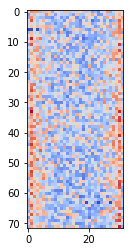

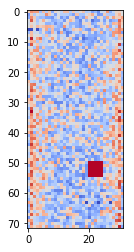

In [207]:
input_images=data_sample[:]
hotregion_image=[]
deadregion_image=[]
random_image=[]
count=0
for k in input_images:
    a=np.random.randint(datasampleshape[2]-5)
    b=np.random.randint(datasampleshape[1]-5)
    xdim=(a,a+5)
    ydim=(b,b+5)
    hotregion_image.append( hotregion(k,xdim,ydim))
    #deadregion_image.append(killregion(k,xdim,ydim))
    #random_image.append(randomregion(k,xdim,ydim))
    #print "xdim,ydim:",xdim,ydim
    #print count
    count+=1
    
    
hotregion_image=np.array(hotregion_image)
deadregion_image=np.array(deadregion_image)
random_image=np.array(random_image)
#print "xdim,ydim",xdim,ydim
print "Shape of regular image is: ",input_images.shape
print "Shape of dead image is: " ,deadregion_image.shape
print "Shape of hot image is: " ,hotregion_image.shape
print "Shape of random image is: " ,random_image.shape

print '\nmax of image is: ' ,np.max(input_images)
print ''
im=plt.imshow(input_images[1],cmap=cm.coolwarm)
plt.show()
plt.clf()


#im=plt.imshow(random_image[1],cmap=cm.coolwarm)
#plt.show()
#plt.clf()
#
im=plt.imshow(hotregion_image[1],cmap=cm.coolwarm)
plt.show()
plt.clf()#plt.clf clears the figure and it's axis but leaves the window open. 
         #as opposed to plt.close which closes the window. If you are showing many images at a time without
         #closing the window it is better.

#im=plt.imshow(deadregion_image[1],cmap=cm.coolwarm)
#plt.show()
#plt.clf()
#input_image=np.reshape(input_image,(input_image.shape[0],input_image.shape[1]))


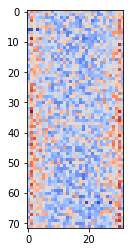

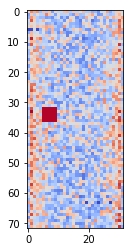

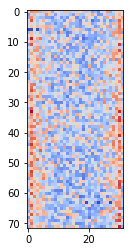

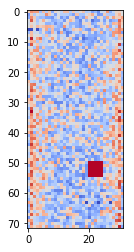

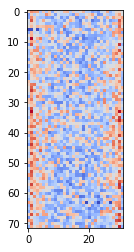

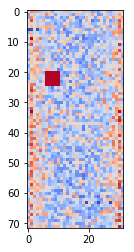

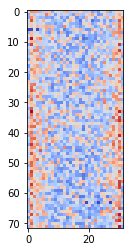

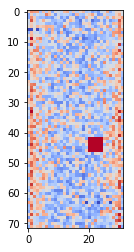

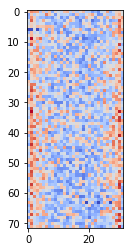

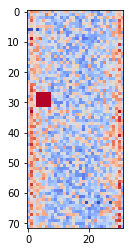

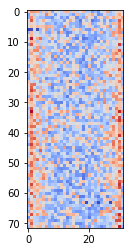

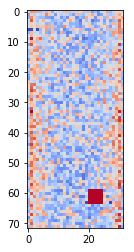

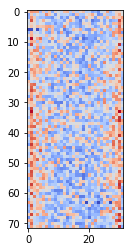

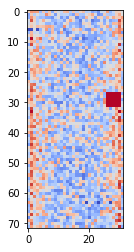

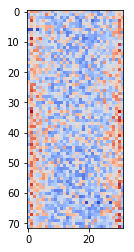

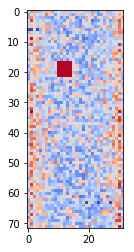

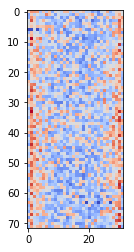

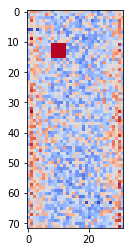

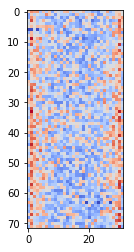

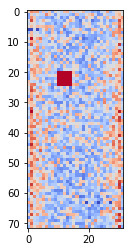

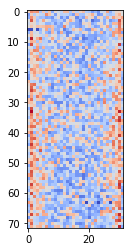

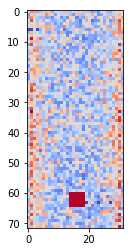

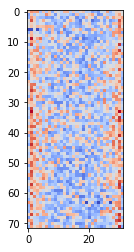

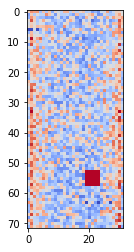

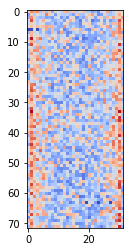

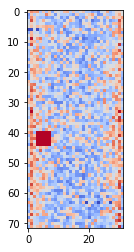

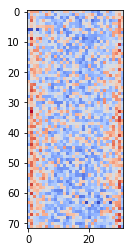

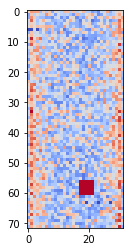

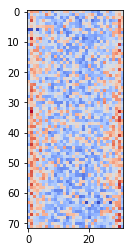

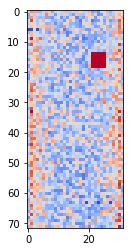

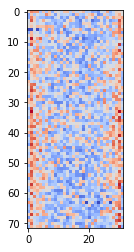

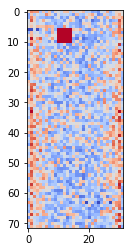

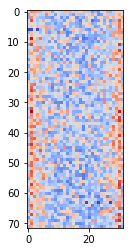

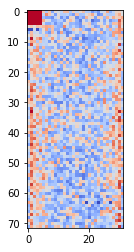

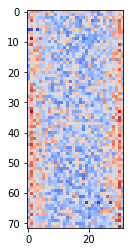

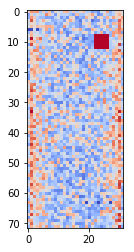

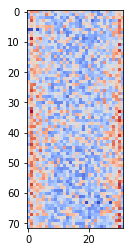

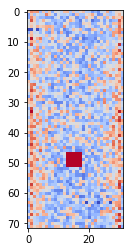

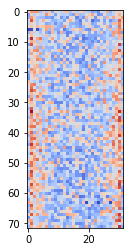

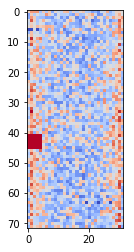

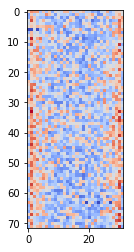

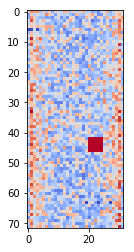

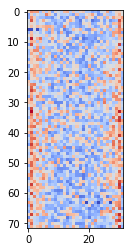

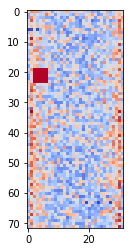

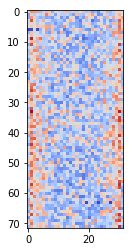

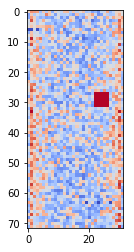

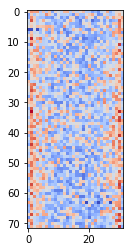

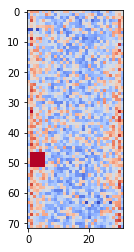

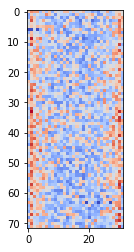

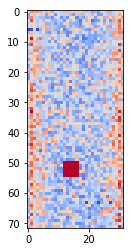

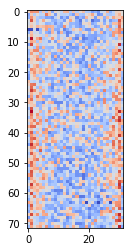

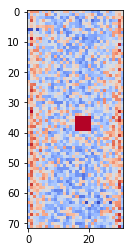

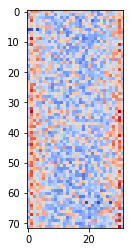

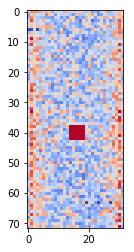

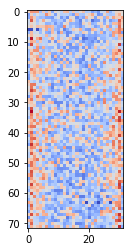

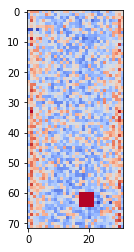

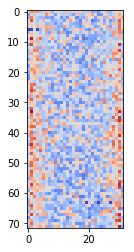

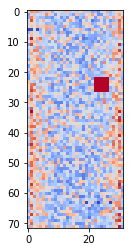

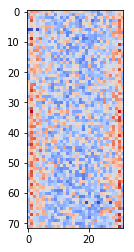

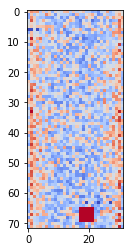

In [208]:
for k in range(30):
    im=plt.imshow(input_images[k],cmap=cm.coolwarm)
    plt.show()
    plt.clf()

    #im=plt.imshow(random_image[k],cmap=cm.coolwarm)
    #plt.show()
    #plt.clf()
    #
    im=plt.imshow(hotregion_image[k],cmap=cm.coolwarm)
    plt.show()
    plt.clf()#plt.clf clears the figure and it's axis but leaves the window open. 
             #as opposed to plt.close which closes the window. If you are showing many images at a time without
             #closing the window it is better.
    
    #im=plt.imshow(deadregion_image[k],cmap=cm.coolwarm)
    #plt.show()
    #plt.clf()

In [209]:
sample= np.append(data_sample,hotregion_image,axis=0)
#sample= np.append(data_sample,deadregion_image,axis=0)
#sample= np.append(sample,random_image,axis=0)            


print sample.shape

(1998, 72, 32)


create the corresponding label matrices

This line of code below was used when the reshping of the images was needed. Now we use a CNN so we don't need to 

For CNN

X shape is:  (1998, 72, 32)
y shape is:  (1998, 2)
Xtrain.shape (1198, 72, 32)
Xtest.shape (800, 72, 32)
ytrain.shape (1198, 2)
ytest.shape (800, 2)
-------------------
[ 1.  0.]


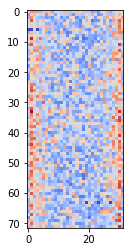

-------------------
[ 0.  1.]


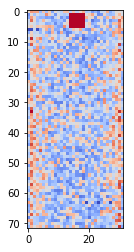

-------------------
[ 1.  0.]


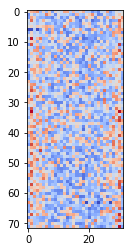

-------------------
[ 1.  0.]


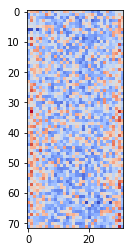

-------------------
[ 1.  0.]


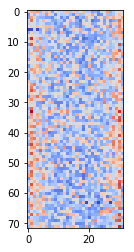

-------------------
[ 1.  0.]


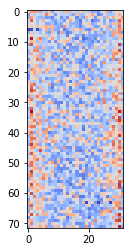

-------------------
[ 1.  0.]


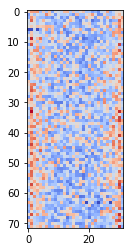

-------------------
[ 0.  1.]


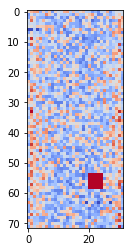

-------------------
[ 0.  1.]


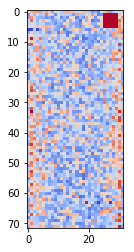

-------------------
[ 1.  0.]


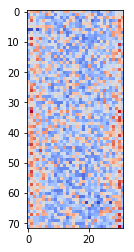

-------------------
[ 1.  0.]


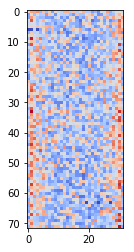

-------------------
[ 1.  0.]


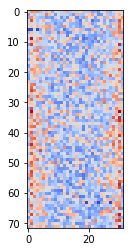

-------------------
[ 0.  1.]


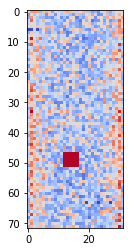

-------------------
[ 0.  1.]


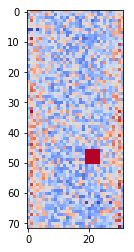

-------------------
[ 1.  0.]


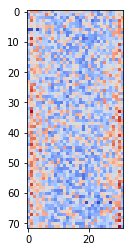

-------------------
[ 1.  0.]


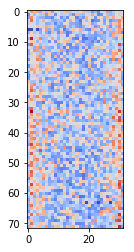

-------------------
[ 0.  1.]


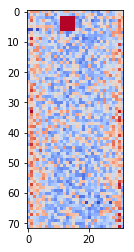

-------------------
[ 1.  0.]


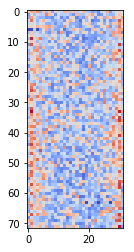

-------------------
[ 0.  1.]


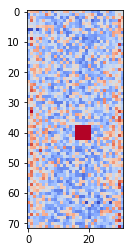

-------------------
[ 1.  0.]


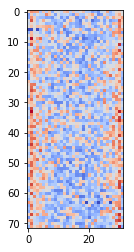

-------------------
[ 0.  1.]


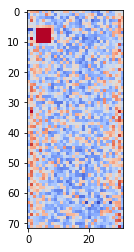

-------------------
[ 1.  0.]


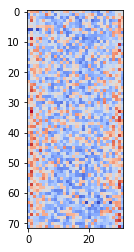

-------------------
[ 0.  1.]


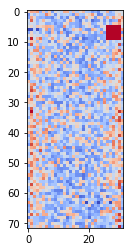

-------------------
[ 0.  1.]


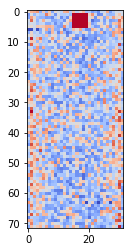

-------------------
[ 0.  1.]


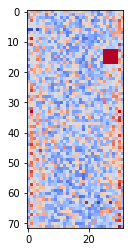

-------------------
[ 0.  1.]


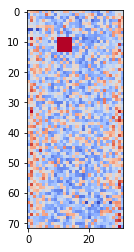

-------------------
[ 1.  0.]


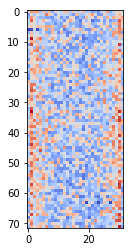

-------------------
[ 1.  0.]


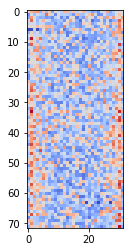

-------------------
[ 1.  0.]


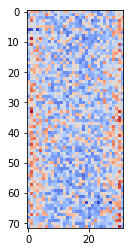

-------------------
[ 0.  1.]


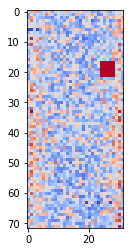

Xtrain.shape after if statement (1198, 72, 32, 1)
Xtest.shape after if statement (800, 72, 32, 1)
ytrain.shape after if statement (1198, 2)
ytest.shape after if statement (800, 2)


In [218]:
X=np.copy(sample)
y=np.zeros((sample.shape[0],1))
y[999:]=1

#for i in range(3,0,-1):
#    y[-i*input_images.shape[0]:]=4-i


# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)
#y1=y.copy()
y=to_categorical(y,2)

#y=sample[:,-1]
print "X shape is: ",X.shape
print "y shape is: ",y.shape
# input image dimensions
img_rows, img_cols = X.shape[1],X.shape[2]

Xtrain, Xtest ,ytrain, ytest =train_test_split(X,y,test_size=.4,random_state =5 )
#Xtrain, Xtest ,ytrain, ytest =train_test_split(X,y1,test_size=.4,random_state =5 )
print 'Xtrain.shape',Xtrain.shape
print 'Xtest.shape',Xtest.shape
print 'ytrain.shape',ytrain.shape
print 'ytest.shape',ytest.shape
for k in range(30):
    print'-------------------'
    print ytest[k]
    im=plt.imshow(Xtest[k],cmap=cm.coolwarm)
    plt.show()
    plt.clf()

if K.image_data_format() == 'channels_first':
    Xtrain = Xtrain.reshape(Xtrain.shape[0], 1, img_rows, img_cols)
    Xtest = Xtest.reshape(Xtest.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    Xtrain = Xtrain.reshape(Xtrain.shape[0], img_rows, img_cols, 1)
    Xtest = Xtest.reshape(Xtest.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


print 'Xtrain.shape after if statement',Xtrain.shape
print 'Xtest.shape after if statement',Xtest.shape
print 'ytrain.shape after if statement',ytrain.shape
print 'ytest.shape after if statement',ytest.shape



# Creating and training the model

In [229]:
# For a single-input model with 2 classes (binary classification):
model = Sequential([
    Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(input_shape),data_format='channels_last'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dense(128, activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    #Dropout(0.25),
    Flatten( ),
    #Dense(128, activation='relu',),
    #Dropout(0.5),
    #Flatten(),
    Dense(2,activation='softmax')
])

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])



In [230]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 70, 30, 64)        640       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 68, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 34, 14, 128)       0         
_________________________________________________________________
dense_96 (Dense)             (None, 34, 14, 128)       16512     
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 32, 12, 64)        73792     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 16, 6, 64)         0         
_________________________________________________________________
flatten_55 (Flatten)         (None, 6144)              0         
__________

Train on 1198 samples, validate on 800 samples
Epoch 1/3
1198/1198 [==============================] - 63s 52ms/step - loss: 8.0321 - acc: 0.5017 - val_loss: 8.0993 - val_acc: 0.4975
Epoch 2/3
1198/1198 [==============================] - 62s 52ms/step - loss: 8.0321 - acc: 0.5017 - val_loss: 8.0993 - val_acc: 0.4975
Epoch 3/3
1198/1198 [==============================] - 64s 53ms/step - loss: 8.0321 - acc: 0.5017 - val_loss: 8.0993 - val_acc: 0.4975


TypeError: 'History' object has no attribute '__getitem__'

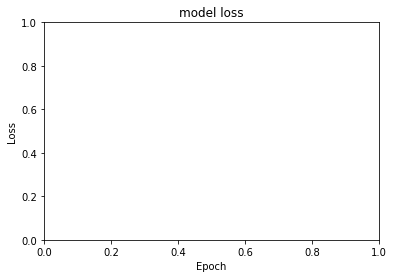

In [231]:
history = model.fit(Xtrain,ytrain,epochs=3,verbose=1,validation_data=(Xtest,ytest))
def plot_loss(data, title):
    """Plots the training and validation loss"""
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(title)
    plt.plot(data["loss"], linestyle=line_styles[0], color=color_palette["Indigo"][900], linewidth=3)
    plt.plot(data["val_loss"], linestyle=line_styles[2], color=color_palette["Teal"][300], linewidth=3)
    plt.legend(["Train", "Validation"], loc="upper right", frameon=False)
    plt.yscale("log")
    plt.show();

plot_loss(history, "model loss")


In [225]:
pred=model.predict(Xtest)
print metrics.accuracy_score(ytest,pred)

print ytest[50:55]
print pred [50:55]

confusion= metrics.confusion_matrix(ytest,pred,labels=[0,1])
print confusion

0.4975
[[ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]]
[[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]


ValueError: multilabel-indicator is not supported

In [182]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  0 402]
 [  0 398]]


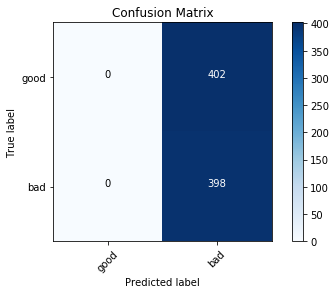

In [183]:
plotlabels=['good','bad']
plot_confusion_matrix(confusion,plotlabels,title='Confusion Matrix')